### Daniel Dorado y Sofía Álvarez 

In [1]:
# ESAI
import numpy as np
import pandas as pd
import seaborn as sns
from os import listdir
import matplotlib.pyplot as plt
from os.path import isfile, join

<h2 align='center'>Laboratorio 1: Rayos X</h2>

### Actividad 1: Rayos X característicos del Cobre
Lo primero que nos interesa es leer los datos y graficar la intensidad en función del ángulo del modo acoplado entre el cristal y el tubo Geiger-Müller.

In [2]:
rayos_caracteristicos_Cu = pd.read_csv('Actividad1/RayosCaracteristicosCu', sep='\t')

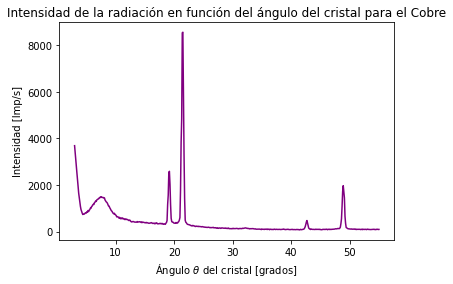

In [4]:
plt.plot(rayos_caracteristicos_Cu['Angulo'], rayos_caracteristicos_Cu['Intensidad'], color='purple')
plt.xlabel(r'Ángulo $\theta$ del cristal [grados]')
plt.ylabel(r'Intensidad [Imp/s]')
plt.title('Intensidad de la radiación en función del ángulo del cristal para el Cobre')
plt.show()

Saquemos el pico más alto de radiación, que corresponde a la transición $K_\alpha$,

In [5]:
pico_K_alpha = rayos_caracteristicos_Cu[rayos_caracteristicos_Cu['Intensidad'] == max(rayos_caracteristicos_Cu['Intensidad'])]
pico_K_alpha

,Angulo,Intensidad
185,21.5,8555.0


Notemos que esto ocurre a un ángulo de $21.5$º, cuando debería ocurrir en $22,6$º. Esto ocurre debido a que, la clase pasada, las instrucciones de calibración empleadas conducían a un ajuste erróneo. En este caso, la máxima intensidad nos daba en $22$º. Según las instrucciones, debíamos reajustar el cero a $+0,6$º, cuando debíamos ponerlo en $-0,6$º. Entonces, en realidad, estábamos duplicando el desajuste. Note que, si sumamos $1,2$º a nuestro valor, obtenemos $22,7$º, lo cual se encuentra dentro del márgen de incertidumbre del equipo. 

Estos datos los vamos a repetir mañana.

### Actividad 2: Absorción de Rayos X

Tomamos los datos sin atenuación, para tener una gráfica de referencia y leemos los archivos de cada material.

In [6]:
sin_atenuacion = pd.read_csv('Actividad2/Sin material', sep='\t')
al_0_02 = pd.read_csv('Actividad2/Al 0-02', sep='\t')
al_0_06 = pd.read_csv('Actividad2/Al 0-06', sep='\t')
zn_0_025 = pd.read_csv('Actividad2/Zn 0-025', sep='\t')
zn_0_05 = pd.read_csv('Actividad2/Zn 0-05', sep='\t')

Graficamos la intensidad de la radiación en función del ángulo del cristal, para ambos materiales y sus diferentes espesores, teniendo como referencia el barrido inicial.

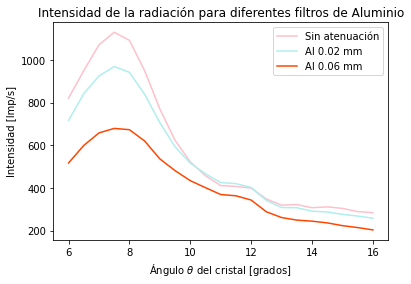

In [7]:
# Para el Aluminio
plt.plot(sin_atenuacion['Angulo'], sin_atenuacion['Intensidad'], color='pink', label='Sin atenuación')
plt.plot(al_0_02['Angulo'], al_0_02['Intensidad'], color='paleturquoise', label='Al 0.02 mm')
plt.plot(al_0_06['Angulo'], al_0_06['Intensidad'], color='orangered', label='Al 0.06 mm')

plt.xlabel(r'Ángulo $\theta$ del cristal [grados]')
plt.ylabel(r'Intensidad [Imp/s]')
plt.title('Intensidad de la radiación para diferentes filtros de Aluminio')
plt.legend()
plt.show()

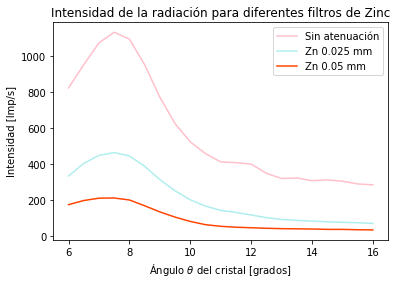

In [8]:
# Para el Zinc
plt.plot(sin_atenuacion['Angulo'], sin_atenuacion['Intensidad'], color='pink', label='Sin atenuación')
plt.plot(zn_0_025['Angulo'], zn_0_025['Intensidad'], color='paleturquoise', label='Zn 0.025 mm')
plt.plot(zn_0_05['Angulo'], zn_0_05['Intensidad'], color='orangered', label='Zn 0.05 mm')

plt.xlabel(r'Ángulo $\theta$ del cristal [grados]')
plt.ylabel(r'Intensidad [Imp/s]')
plt.title('Intensidad de la radiación para diferentes filtros de Zinc')
plt.legend()
plt.show()

Para ambos materiales, podemos ver que hay disminución en la intensidad de la radiación a medida que aumenta el espesor del material usado como filtro. Para el Zinc, la disminución en la intensidad es apreciablemente mayor que la observada en el Aluminio. Esto está asociado a su coeficiente de atenuación. Esperamos que el del Zinc sea mayor.

### Actividad 3: Dependencia de la intensidad del voltaje y corriente del ánodo

Primero, analizamos la dependencia de la intensidad del voltaje del ánodo.

In [9]:
voltaje_variable = pd.read_csv('Actividad3/Voltaje-variable', sep='\t')
voltaje_variable.drop('Unnamed: 14', axis=1, inplace=True)

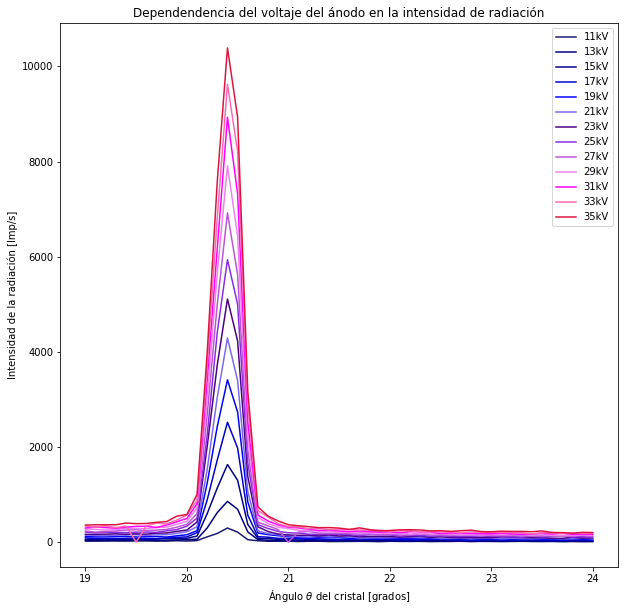

In [10]:
plt.figure(figsize=(10,10))
i = 0
colors = ['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'mediumslateblue', 'indigo', 'blueviolet', 'mediumorchid', 'violet', 'fuchsia', 'hotpink', 'crimson']
for column in voltaje_variable.columns: 
    if column != 'Angulo':
        plt.plot(voltaje_variable['Angulo'], voltaje_variable[column], color=colors[i], label=column)
        i += 1
plt.xlabel(r'Ángulo $\theta$ del cristal [grados]')
plt.ylabel('Intensidad de la radiación [Imp/s]')
plt.legend()
plt.title('Dependendencia del voltaje del ánodo en la intensidad de radiación')
plt.show()

In [11]:
pico = voltaje_variable[voltaje_variable['35kV'] == max(voltaje_variable['35kV'])]
pico

,Angulo,11kV,13kV,15kV,17kV,19kV,21kV,23kV,25kV,27kV,29kV,31kV,33kV,35kV
14,20.4,296.0,856.0,1630.0,2520.0,3411.0,4291.0,5111.0,5938.0,6922.0,7911.0,8933.0,9626.0,10390.0


De la gráfica, podemos ver que, entre más alto es el voltaje del ánodo, mayor es la intensidad de la radiación. Note que el pico debería ocurrir en $22.6$º, no obstante, por el error en la calibración mencionado en la actividad 1, este está corrido $22.6$º  $- 20.4$º = $2.2$º. El error es diferente porque esta calibración la hicimos hoy. 

Ahora, analizamos la dependencia de la corriente del ánodo en la intensidad de radiación.

In [12]:
corriente_variable = pd.read_csv('Actividad3/Corriente variable/0-1mA', sep='\t')
files = sorted([f for f in listdir('Actividad3/Corriente variable') if isfile(join('Actividad3/Corriente variable', f))])
for f in files:
    if isfile(join('Actividad3/Corriente variable', f)) and f != '0-1mA':
        corriente = f[-3]
        if corriente != '1':
            corriente_variable['0.'+corriente+'mA'] = pd.read_csv(join('Actividad3/Corriente variable', f), sep='\t')['0.'+corriente+'mA']
        else:
            corriente_variable[corriente+'mA'] = pd.read_csv(join('Actividad3/Corriente variable', f), sep='\t')[corriente+'mA']


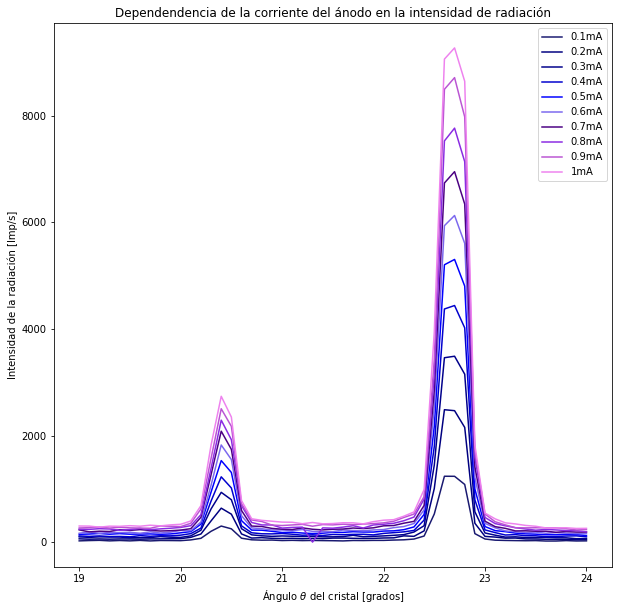

In [13]:
plt.figure(figsize=(10,10))
i = 0
colors = ['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'mediumslateblue', 'indigo', 'blueviolet', 'mediumorchid', 'violet', 'fuchsia', 'hotpink', 'crimson']
for column in corriente_variable.columns: 
    if column != 'Angulo':
        plt.plot(corriente_variable['Angulo'], corriente_variable[column], color=colors[i], label=column)
        i += 1
plt.xlabel(r'Ángulo $\theta$ del cristal [grados]')
plt.ylabel('Intensidad de la radiación [Imp/s]')
plt.legend()
plt.title('Dependendencia de la corriente del ánodo en la intensidad de radiación')
plt.show()

In [14]:
pico = corriente_variable[corriente_variable['1mA'] == max(corriente_variable['1mA'])]
pico

,Angulo,0.1mA,0.2mA,0.3mA,0.4mA,0.5mA,0.6mA,0.7mA,0.8mA,0.9mA,1mA
37,22.7,1235.0,2467.0,3489.0,4441.0,5306.0,6131.0,6954.0,7771.0,8719.0,9277.0


Podemos ver que, de forma similar al voltaje, a medida que aumentamos la corriente en el ánodo, la intensidad de la radiación incrementa. Antes de hacer esta medición, pudimos recalibrar adecuadamente nuestro equipo de rayos X y, por tanto, vemos que el ángulo de intensidad máxima está apenas desfasado $0.1$º, que está en la incertidumbre de la máquina.

### Actividad 4: Ley de Duane-Hunt

In [15]:
bremstrahlung = pd.read_csv('Actividad4', sep='\t')

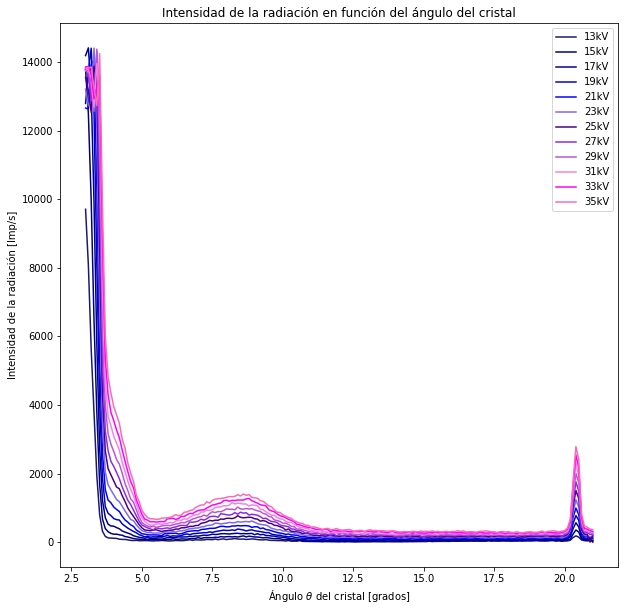

In [16]:
plt.figure(figsize=(10,10))
i = 0
colors = ['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'mediumslateblue', 'indigo', 'blueviolet', 'mediumorchid', 'violet', 'fuchsia', 'hotpink', 'crimson']
for column in bremstrahlung.columns: 
    if column != 'Angulo':
        plt.plot(bremstrahlung['Angulo'], bremstrahlung[column], color=colors[i], label=column)
        i += 1
plt.xlabel(r'Ángulo $\theta$ del cristal [grados]')
plt.ylabel('Intensidad de la radiación [Imp/s]')
plt.legend()
plt.title('Intensidad de la radiación en función del ángulo del cristal')
plt.show()

Sabemos que el Bremstrahlung corresponde a la parte continua del espectro. Vemos que esta ocurre, aproximadamente, entre $5$º y $12º$. 

In [17]:
bremstrahlung = bremstrahlung[(bremstrahlung['Angulo'] >= 5) & (bremstrahlung['Angulo'] <= 12)]

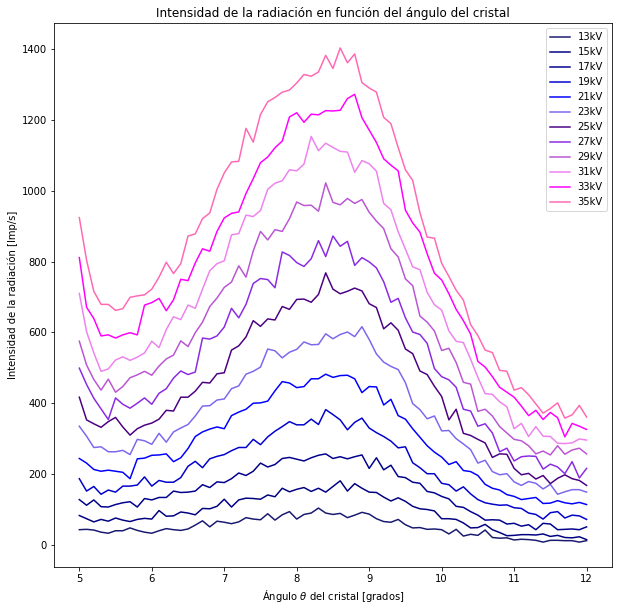

In [18]:
plt.figure(figsize=(10,10))
i = 0
colors = ['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'mediumslateblue', 'indigo', 'blueviolet', 'mediumorchid', 'violet', 'fuchsia', 'hotpink', 'crimson']
for column in bremstrahlung.columns: 
    if column != 'Angulo':
        plt.plot(bremstrahlung['Angulo'], bremstrahlung[column], color=colors[i], label=column)
        i += 1
plt.xlabel(r'Ángulo $\theta$ del cristal [grados]')
plt.ylabel('Intensidad de la radiación [Imp/s]')
plt.legend()
plt.title('Intensidad de la radiación en función del ángulo del cristal')
plt.show()

En esta gráfica, es apreciable la radiación de Bremstrahlung. Al igual que en la actividad 3, podemos ver que la intensidad de la radiación aumenta con el voltaje del ánodo.  